<a href="https://colab.research.google.com/github/NewtoNLN/BootCamp-ML/blob/main/FAST_Aula_09_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 1

Nessa atividade iremos dar os primeiros passos 
para a tarefa de clustering (aprendizado não-supervisionado)
é esperado que ao término dessa prática se tenha as seguintes habilidades:

* Análise exploratória a partir de uma gráfico de dispersão;
* Execução do algoritmo k-means através da lib sklearn;
* Análise dos clusters gerados

## passo 1: import das libs necessárias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

## passo 2: carregar o dataset

Obs: iremos considerar X sendo nosso dataset e y_true o que seriam as classes dos dados

In [ ]:
X, y_true = make_blobs(
    n_samples=100, n_features=2, centers=4, cluster_std=0.4, random_state=0
)

# os dados foram carregados em um formato matricial numpy, 
# porém para facilitar as análises precisaremos converter para um
# tipo pandas DataFrame
X = pd.DataFrame(X)
X

,0,1
0,0.771948,3.831534
1,-1.765399,7.942280
2,1.280685,4.352457
3,1.038249,4.455052
4,1.468386,4.784739
...,...,...
95,-1.690009,7.856326
96,-1.569620,7.559640
97,-1.554201,3.603219
98,-0.879912,7.962951


## passo 3: análise exploratória do dataset

dimensões do dataset (exemplos, features):  (100, 2)

dispersão dos dados:


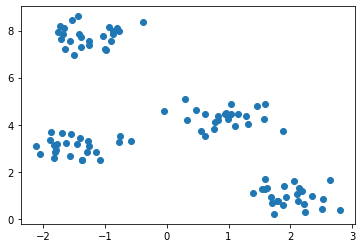

In [ ]:
print("dimensões do dataset (exemplos, features): ", X.shape)

print("\ndispersão dos dados:")

plt.scatter(X[0], X[1])
plt.show()

## passo 4: execução do k-means

In [ ]:
%%time
model = KMeans(n_clusters=4, random_state=0).fit(X)
print(model.cluster_centers_)

y_predict = model.labels_
print(y_predict.tolist())

[[ 0.93588159  4.3205638 ]
 [-1.26414502  7.77811813]
 [ 2.00454873  0.9520213 ]
 [-1.48886624  3.07731162]]
[0, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 0, 1, 3, 2, 0, 3, 3, 0, 2, 2, 2, 1, 2, 2, 3, 0, 1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 2, 3, 0, 0, 0, 2, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 0, 1, 2, 0, 1, 0, 0, 3, 3, 2, 2, 2, 1, 3, 0, 2, 3, 2, 2, 0, 0, 0, 3, 0, 3, 3, 1, 1, 3, 1, 0]
CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 247 ms


TypeError: ignored

## passo 5: avaliação do k-means

Silhueta:  0.7697826124517921
NMI:  1.0


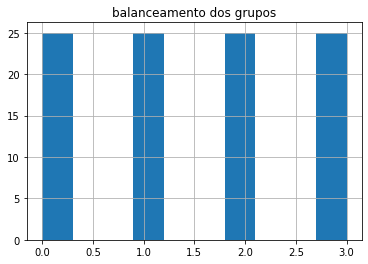

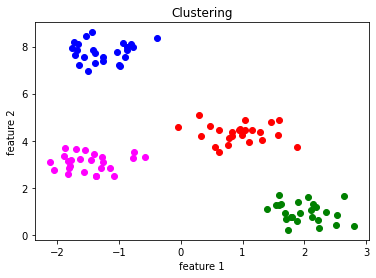

In [ ]:
sil = metrics.silhouette_score(X, y_predict, metric='euclidean')
nmi = metrics.adjusted_mutual_info_score(y_true, y_predict)

print("Silhueta: ", sil)
print("NMI: ", nmi)

# check como ficou o balanceamento
_ = pd.DataFrame(y_predict).hist()
plt.title('balanceamento dos grupos')
plt.show()


# plot de como ficou a clusterização


plt.scatter(X.iloc[y_predict==0, 0], X.iloc[y_predict==0, 1 ], c='red')
plt.scatter(X.iloc[y_predict==1, 0], X.iloc[y_predict==1, 1 ], c='blue')
plt.scatter(X.iloc[y_predict==2, 0], X.iloc[y_predict==2, 1 ], c='green')
plt.scatter(X.iloc[y_predict==3, 0], X.iloc[y_predict==3, 1 ], c='magenta')

# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 1 e atribua a cor vermelha
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 2 e atribua a cor azul
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 3 e atribua a cor verde
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 4 e atribua a cor magenta

# [ALTERE AQUI] plote o gráfico de dispersão para os centróides e atribua a cor amarela
plt.title('Clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()